In [2]:
import numpy as np
import pandas as pd
import operator
import tensorflow as tf
from itertools import cycle, islice
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,7)
mpl.rcParams['figure.dpi'] = 300

In [3]:
# y_true = [[0., 1.], [0., 0.]]
# y_pred = [[1., 1.], [1., 0.]]

# mse0 = tf.keras.losses.MeanSquaredError()
# mse0(y_true, y_pred).numpy()

In [4]:
# mse1 = tf.keras.losses.MeanSquaredError(reduction = tf.keras.losses.Reduction.SUM)
# mse1(y_true, y_pred).numpy()

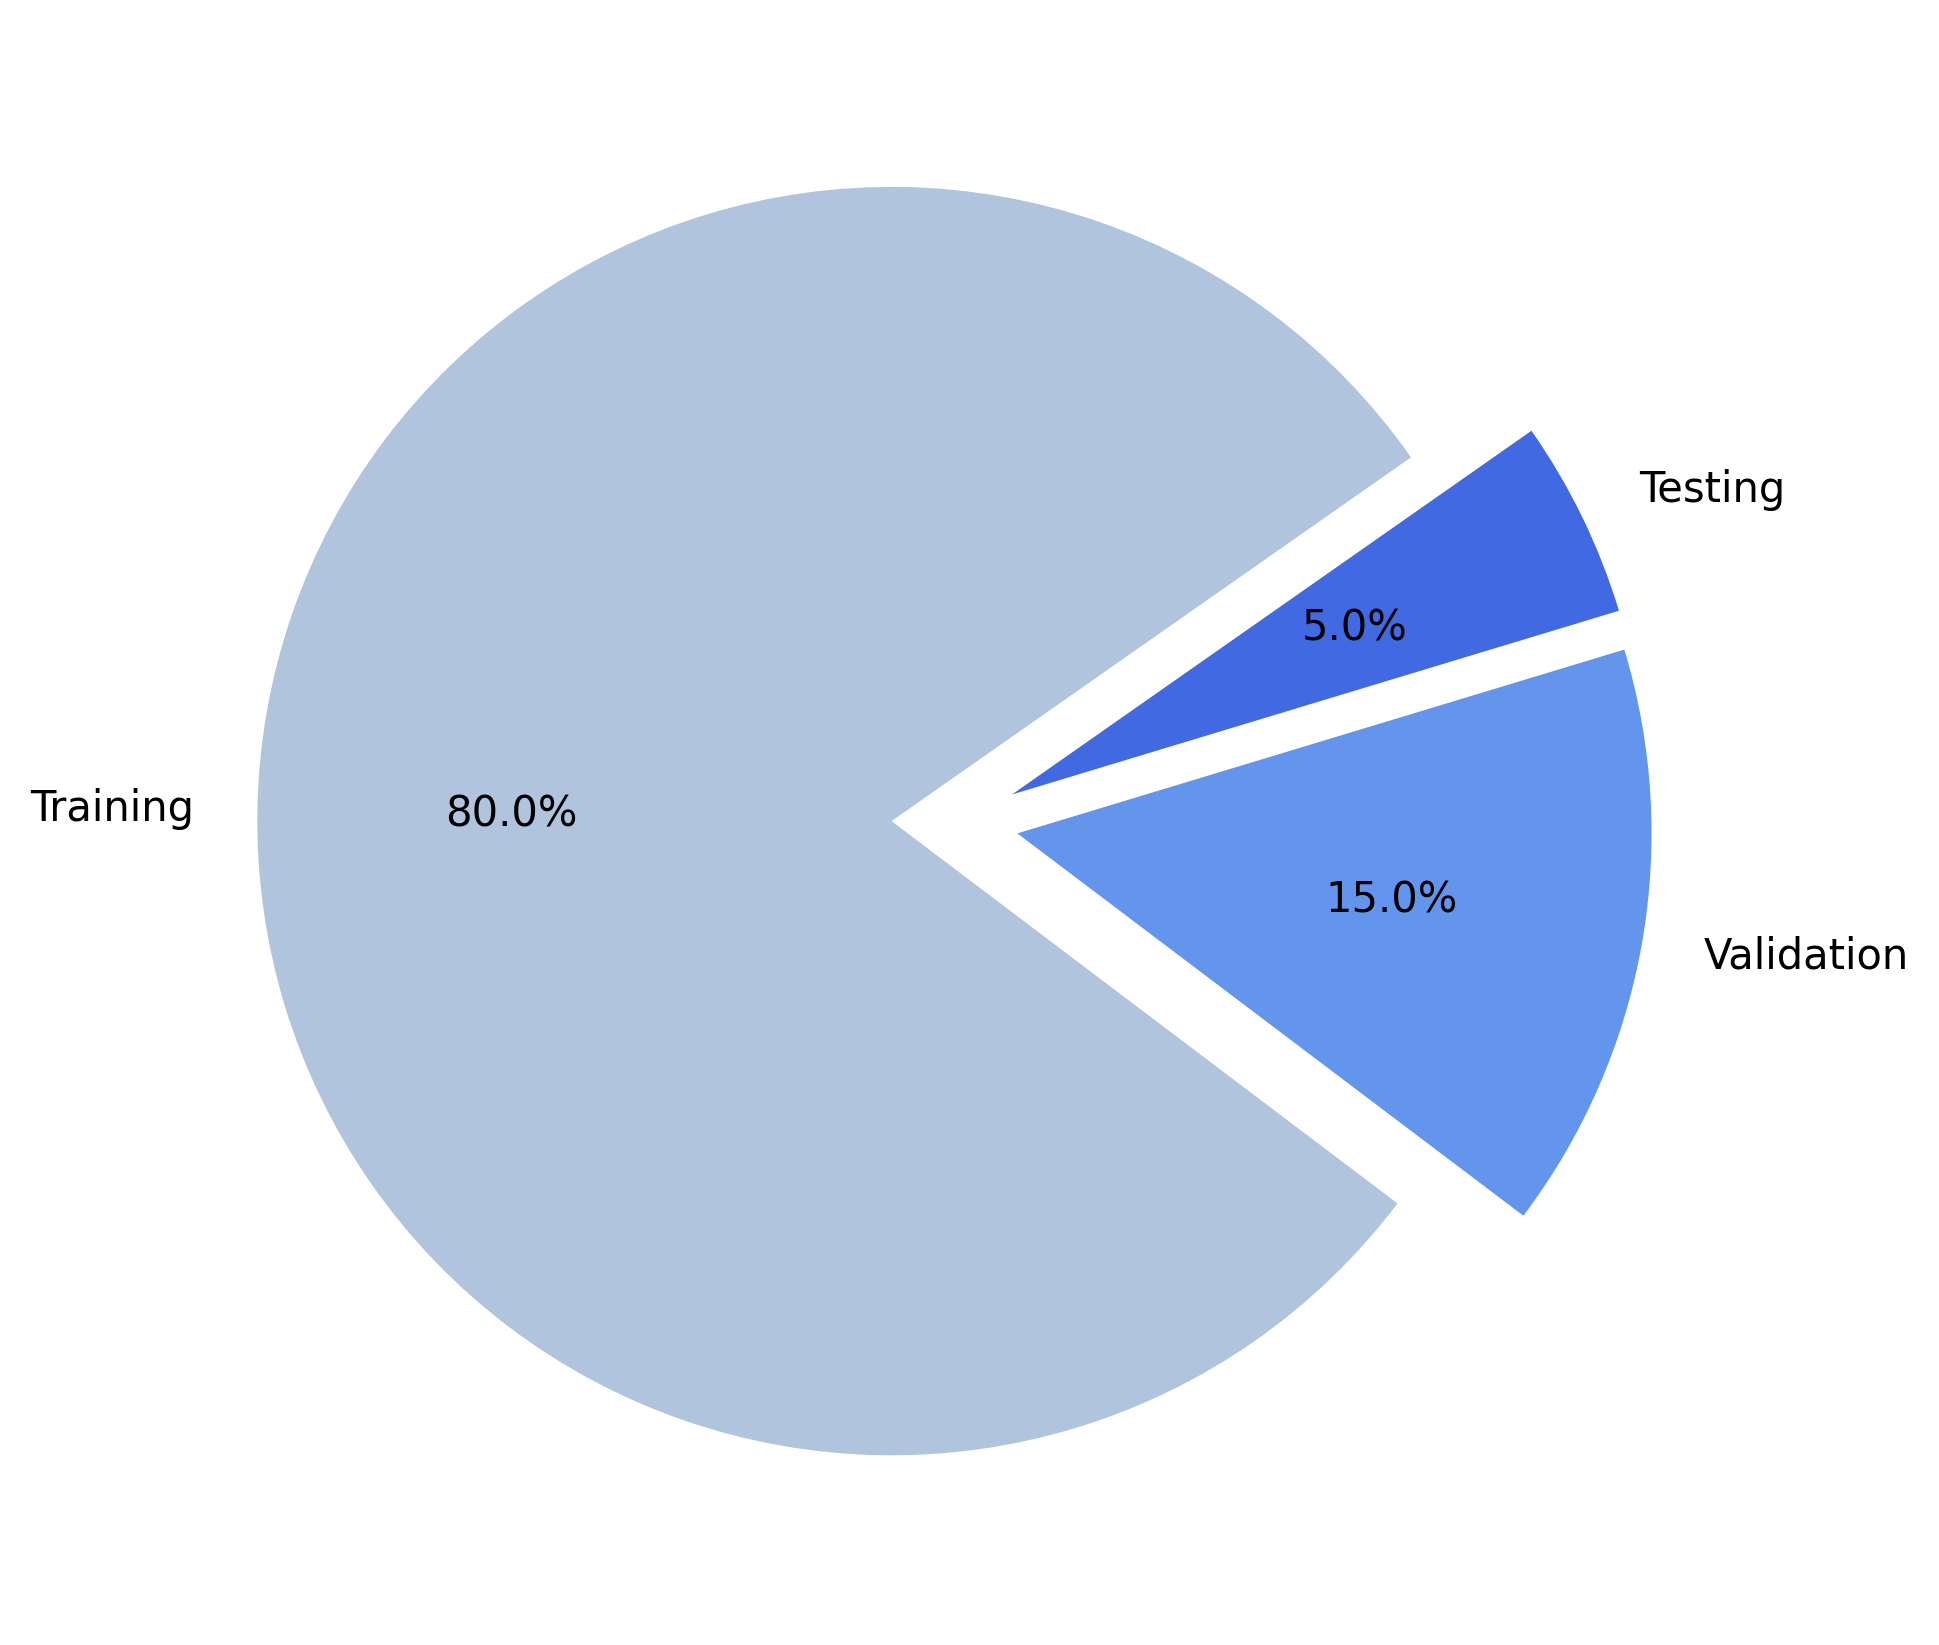

In [5]:
train_set_size = 3204
valid_set_size = 600
test_set_size = 202

y = np.array([train_set_size, valid_set_size, test_set_size])
mylabels = ['Training', 'Validation', 'Testing']
explode = [0.1, 0.1, 0.1]

my_colors = list(islice(cycle(["lightsteelblue", "cornflowerblue", "royalblue"]), None, 3))

plt.pie(
    y,
    labels = mylabels,
    colors = my_colors,
    explode = explode,
    startangle = 35,
    autopct = '%1.1f%%'
)
# plt.axis('equal')
plt.show()

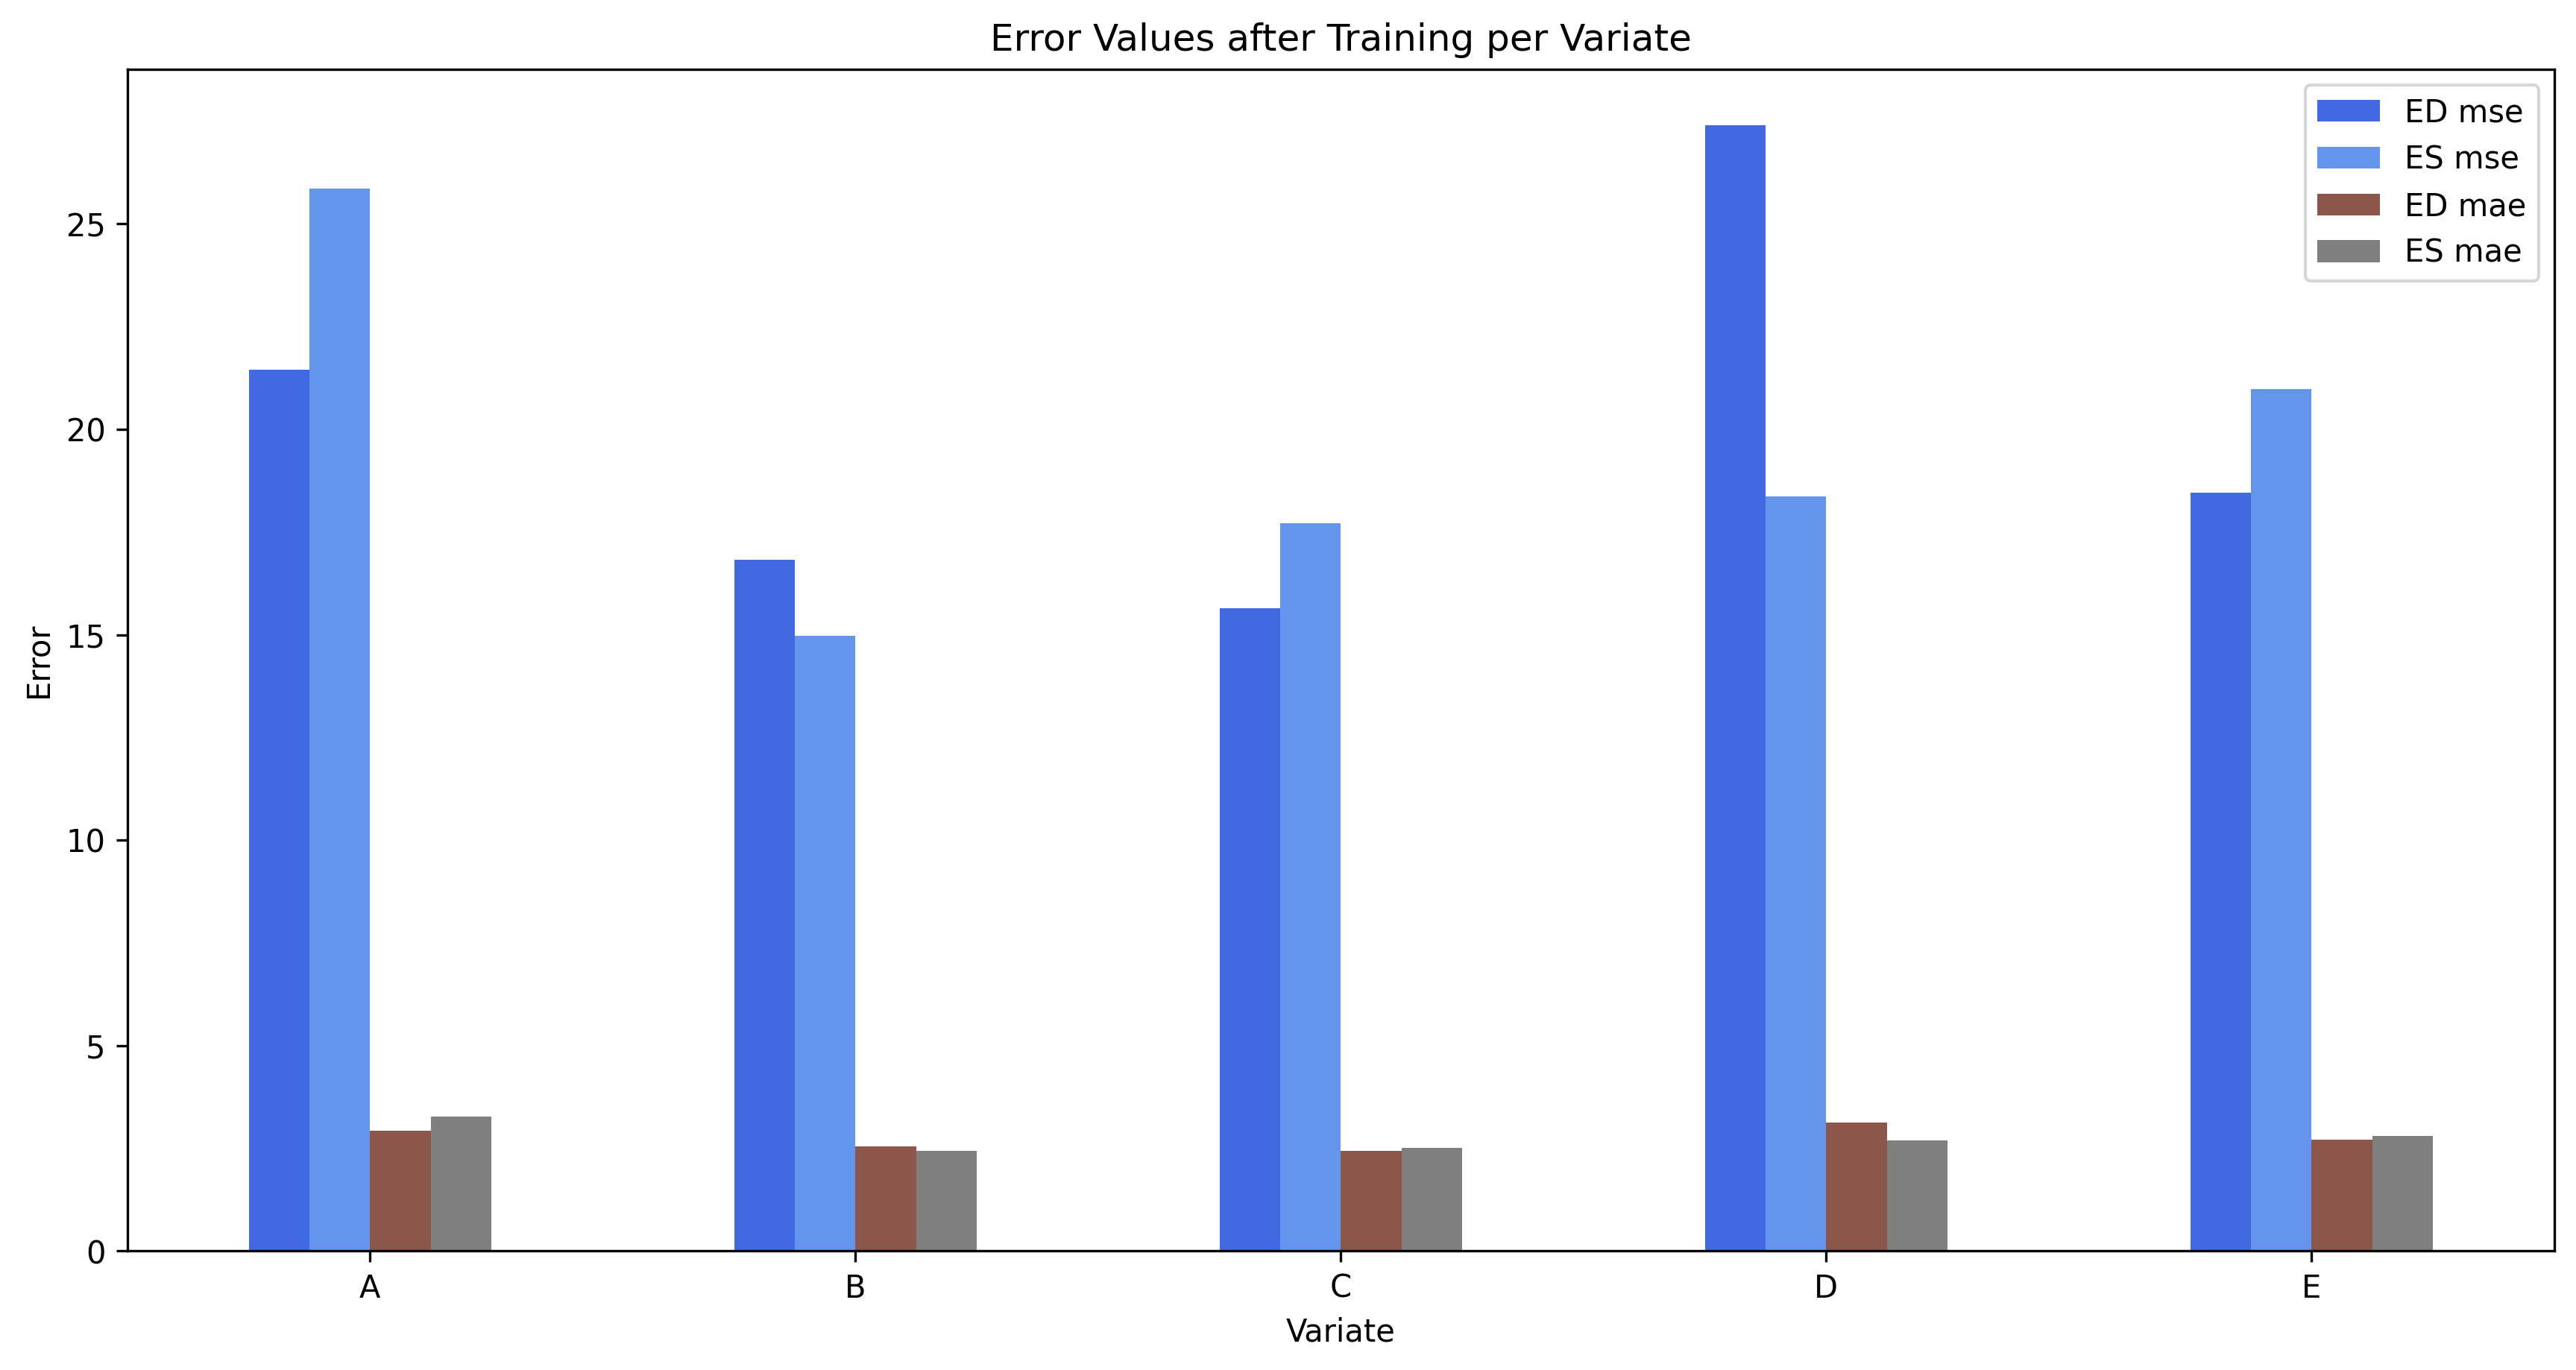

In [6]:
mse_ed_perf = [21.445544554455445, 16.821782178217823, 15.638613861386139, 27.400990099009903, 18.465346534653467]
mse_es_perf = [25.866336633663366, 14.970297029702971, 17.712871287128714, 18.361386138613863, 20.980198019801982]

mae_ed_perf = [2.9207920792079207, 2.5346534653465347, 2.4405940594059405, 3.123762376237624, 2.712871287128713]
mae_es_perf = [3.2623762376237626, 2.4257425742574257, 2.514851485148515, 2.6881188118811883, 2.792079207920792]

index = ['A', 'B', 'C', 'D', 'E']
my_colors = list(islice(cycle(["royalblue", "cornflowerblue", "C5", "C7"]), None, 5))

df = pd.DataFrame({
    'ED mse': mse_ed_perf,
    'ES mse': mse_es_perf,
    'ED mae': mae_ed_perf,
    'ES mae': mae_es_perf
}, index = index)

ax = df.plot.bar(
    rot = 0,
    color=my_colors,
    xlabel="Variate",
    ylabel="Error",
    title="Error Values after Training per Variate"
)

In [7]:
varA_path = "C:/Users/drop/Documents/project/weights/lstm/history.npy"
varB_path = "C:/Users/drop/Documents/project/weights/lstm_lstm/history.npy"
varC_path = "C:/Users/drop/Documents/project/weights/lstm_bi_lstm/history.npy"
varD_path = "C:/Users/drop/Documents/project/weights/bi_lstm_bi_lstm/history.npy"
varE_path = "C:/Users/drop/Documents/project/weights/lstm_lstm_lstm/history.npy"

varA = np.load(varA_path, allow_pickle=True).tolist()['val_mse']
varB = np.load(varB_path, allow_pickle=True).tolist()['val_mse']
varC = np.load(varC_path, allow_pickle=True).tolist()['val_mse']
varD = np.load(varD_path, allow_pickle=True).tolist()['val_mse']
varE = np.load(varE_path, allow_pickle=True).tolist()['val_mse']

In [8]:
varA_idx, varA_val = max(enumerate(-np.array(varA)), key=operator.itemgetter(1))
varB_idx, varB_val = max(enumerate(-np.array(varB)), key=operator.itemgetter(1))
varC_idx, varC_val = max(enumerate(-np.array(varC)), key=operator.itemgetter(1))
varD_idx, varD_val = max(enumerate(-np.array(varD)), key=operator.itemgetter(1))
varE_idx, varE_val = max(enumerate(-np.array(varE)), key=operator.itemgetter(1))

varA_val = -varA_val
varB_val = -varB_val
varC_val = -varC_val
varD_val = -varD_val
varE_val = -varE_val

print(f"Variate A = epoch: {varA_idx}, validation error: {varA_val}")
print(f"Variate B = epoch: {varB_idx}, validation error: {varB_val}")
print(f"Variate C = epoch: {varC_idx}, validation error: {varC_val}")
print(f"Variate D = epoch: {varD_idx}, validation error: {varD_val}")
print(f"Variate E = epoch: {varE_idx}, validation error: {varE_val}")

Variate A = epoch: 11, validation error: 0.017360307276248932
Variate B = epoch: 26, validation error: 0.012922261841595173
Variate C = epoch: 20, validation error: 0.012891815043985844
Variate D = epoch: 18, validation error: 0.013592149131000042
Variate E = epoch: 22, validation error: 0.012708094902336597


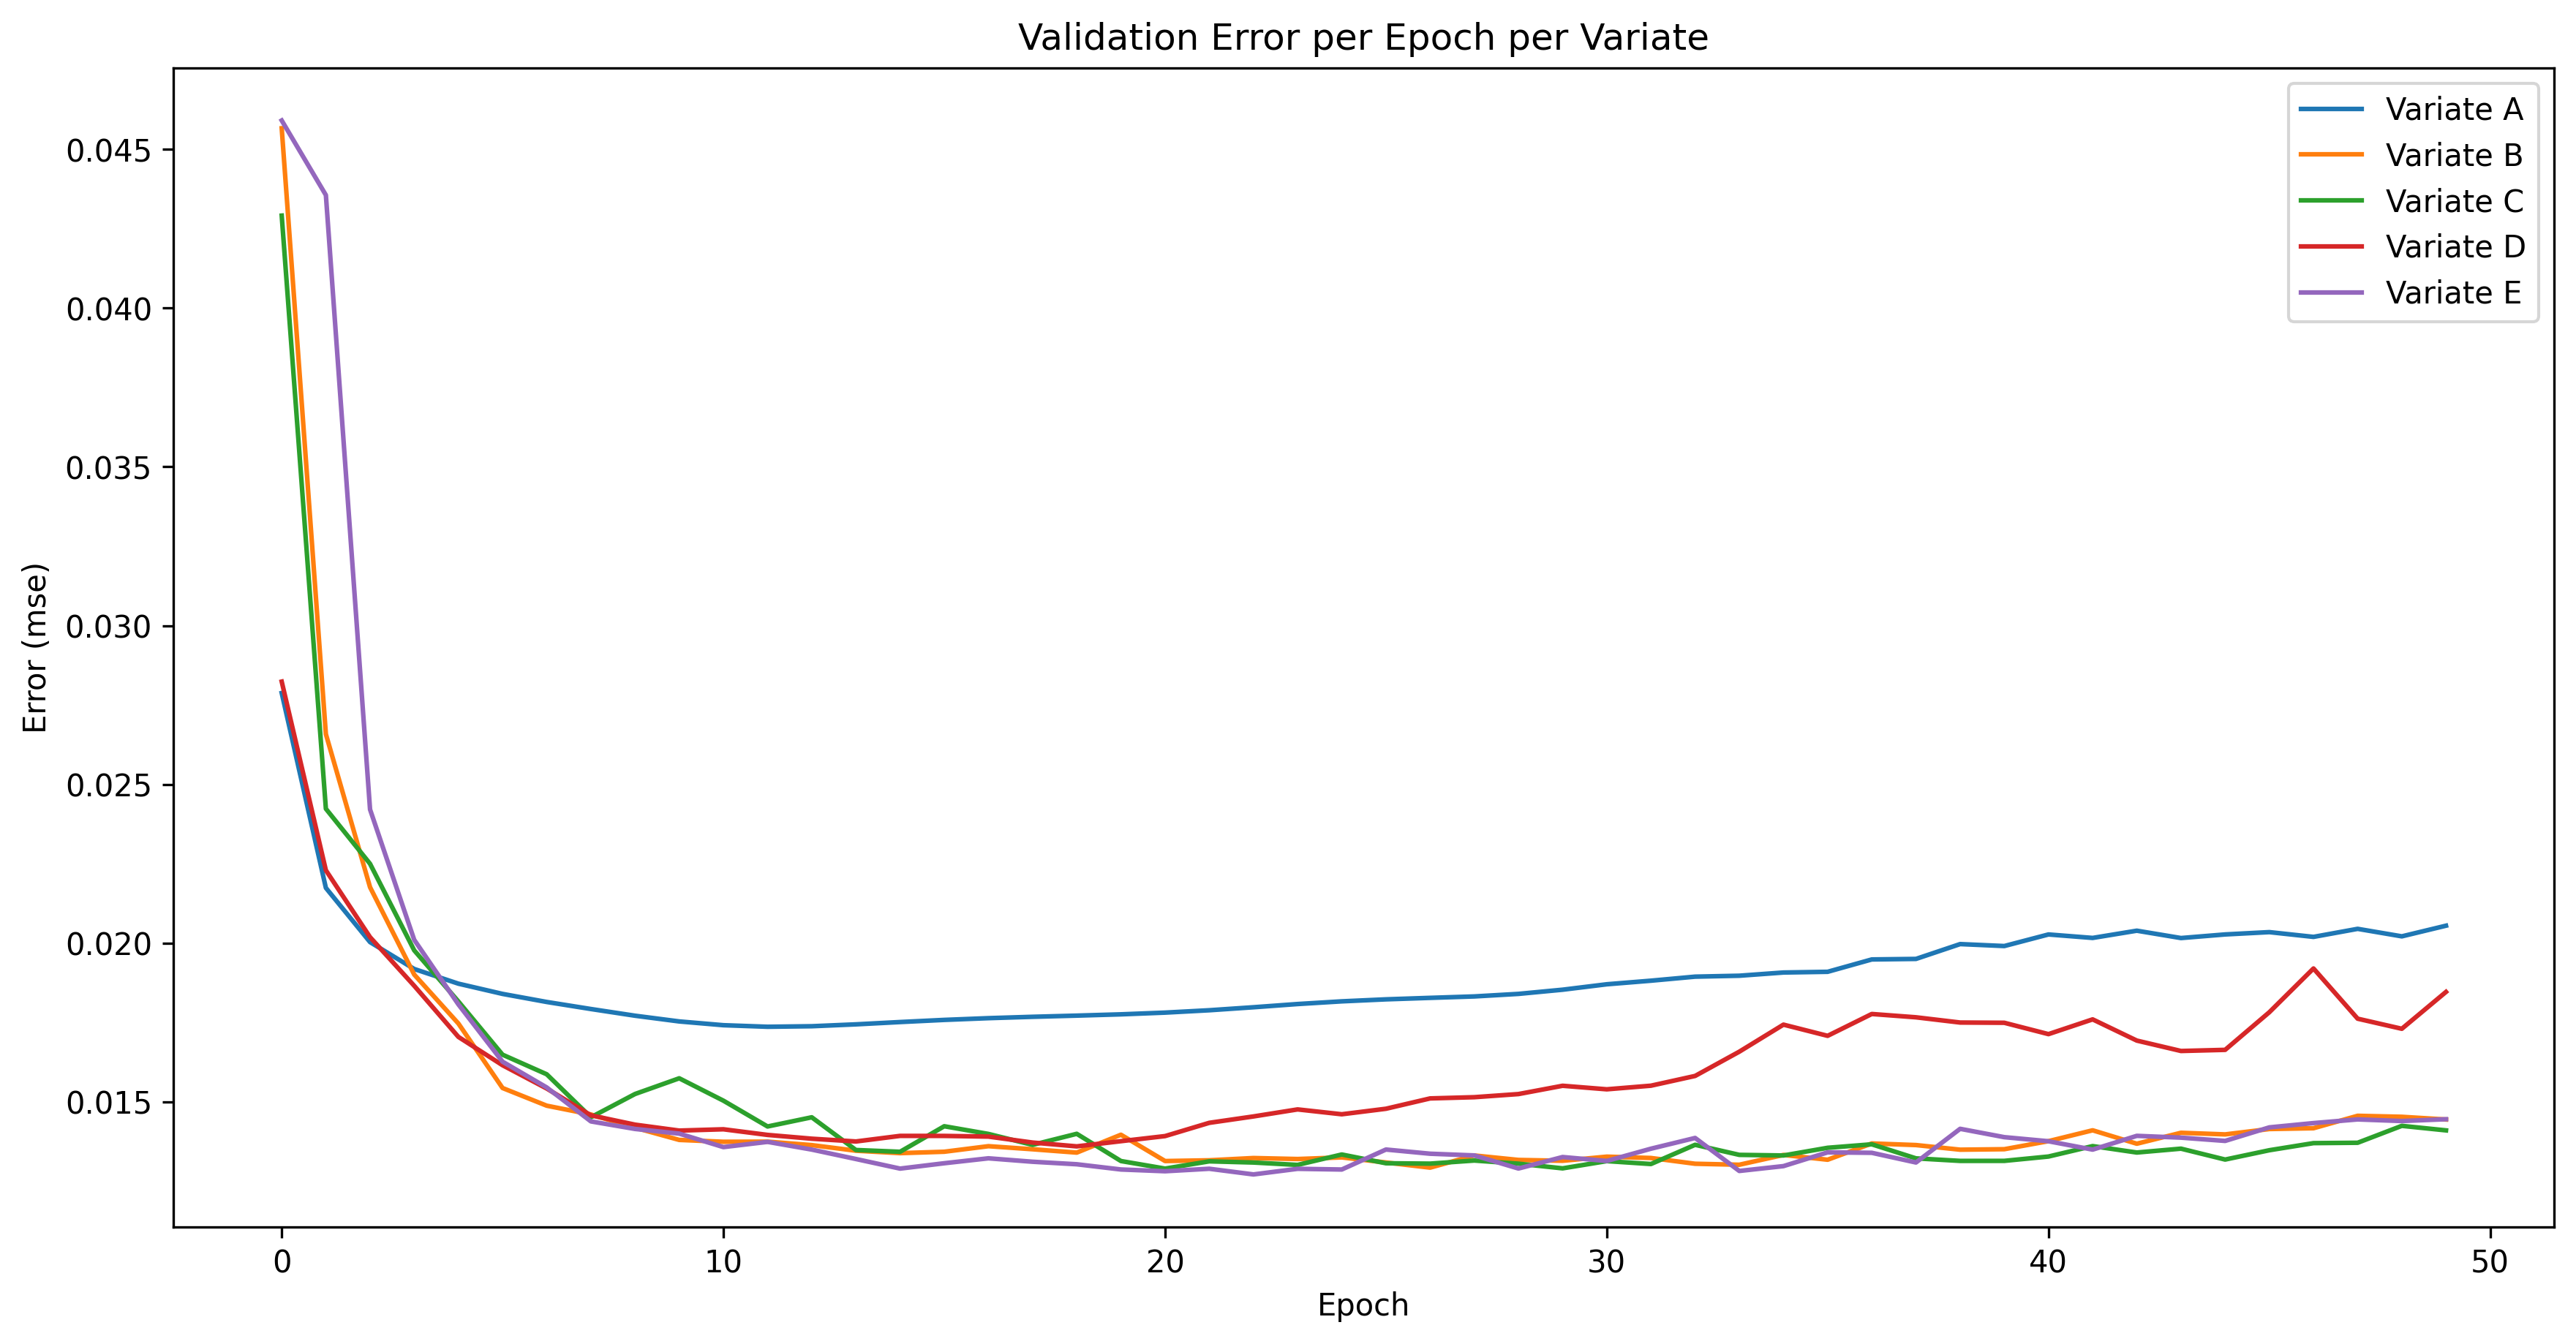

In [9]:
plt.plot(varA, label="Variate A", color="C0")
plt.plot(varB, label="Variate B", color="C1")
plt.plot(varC, label="Variate C", color="C2")
plt.plot(varD, label="Variate D", color="C3")
plt.plot(varE, label="Variate E", color="C4")

plt.title("Validation Error per Epoch per Variate")
plt.xlabel("Epoch")
plt.ylabel("Error (mse)")
plt.legend()
plt.show()

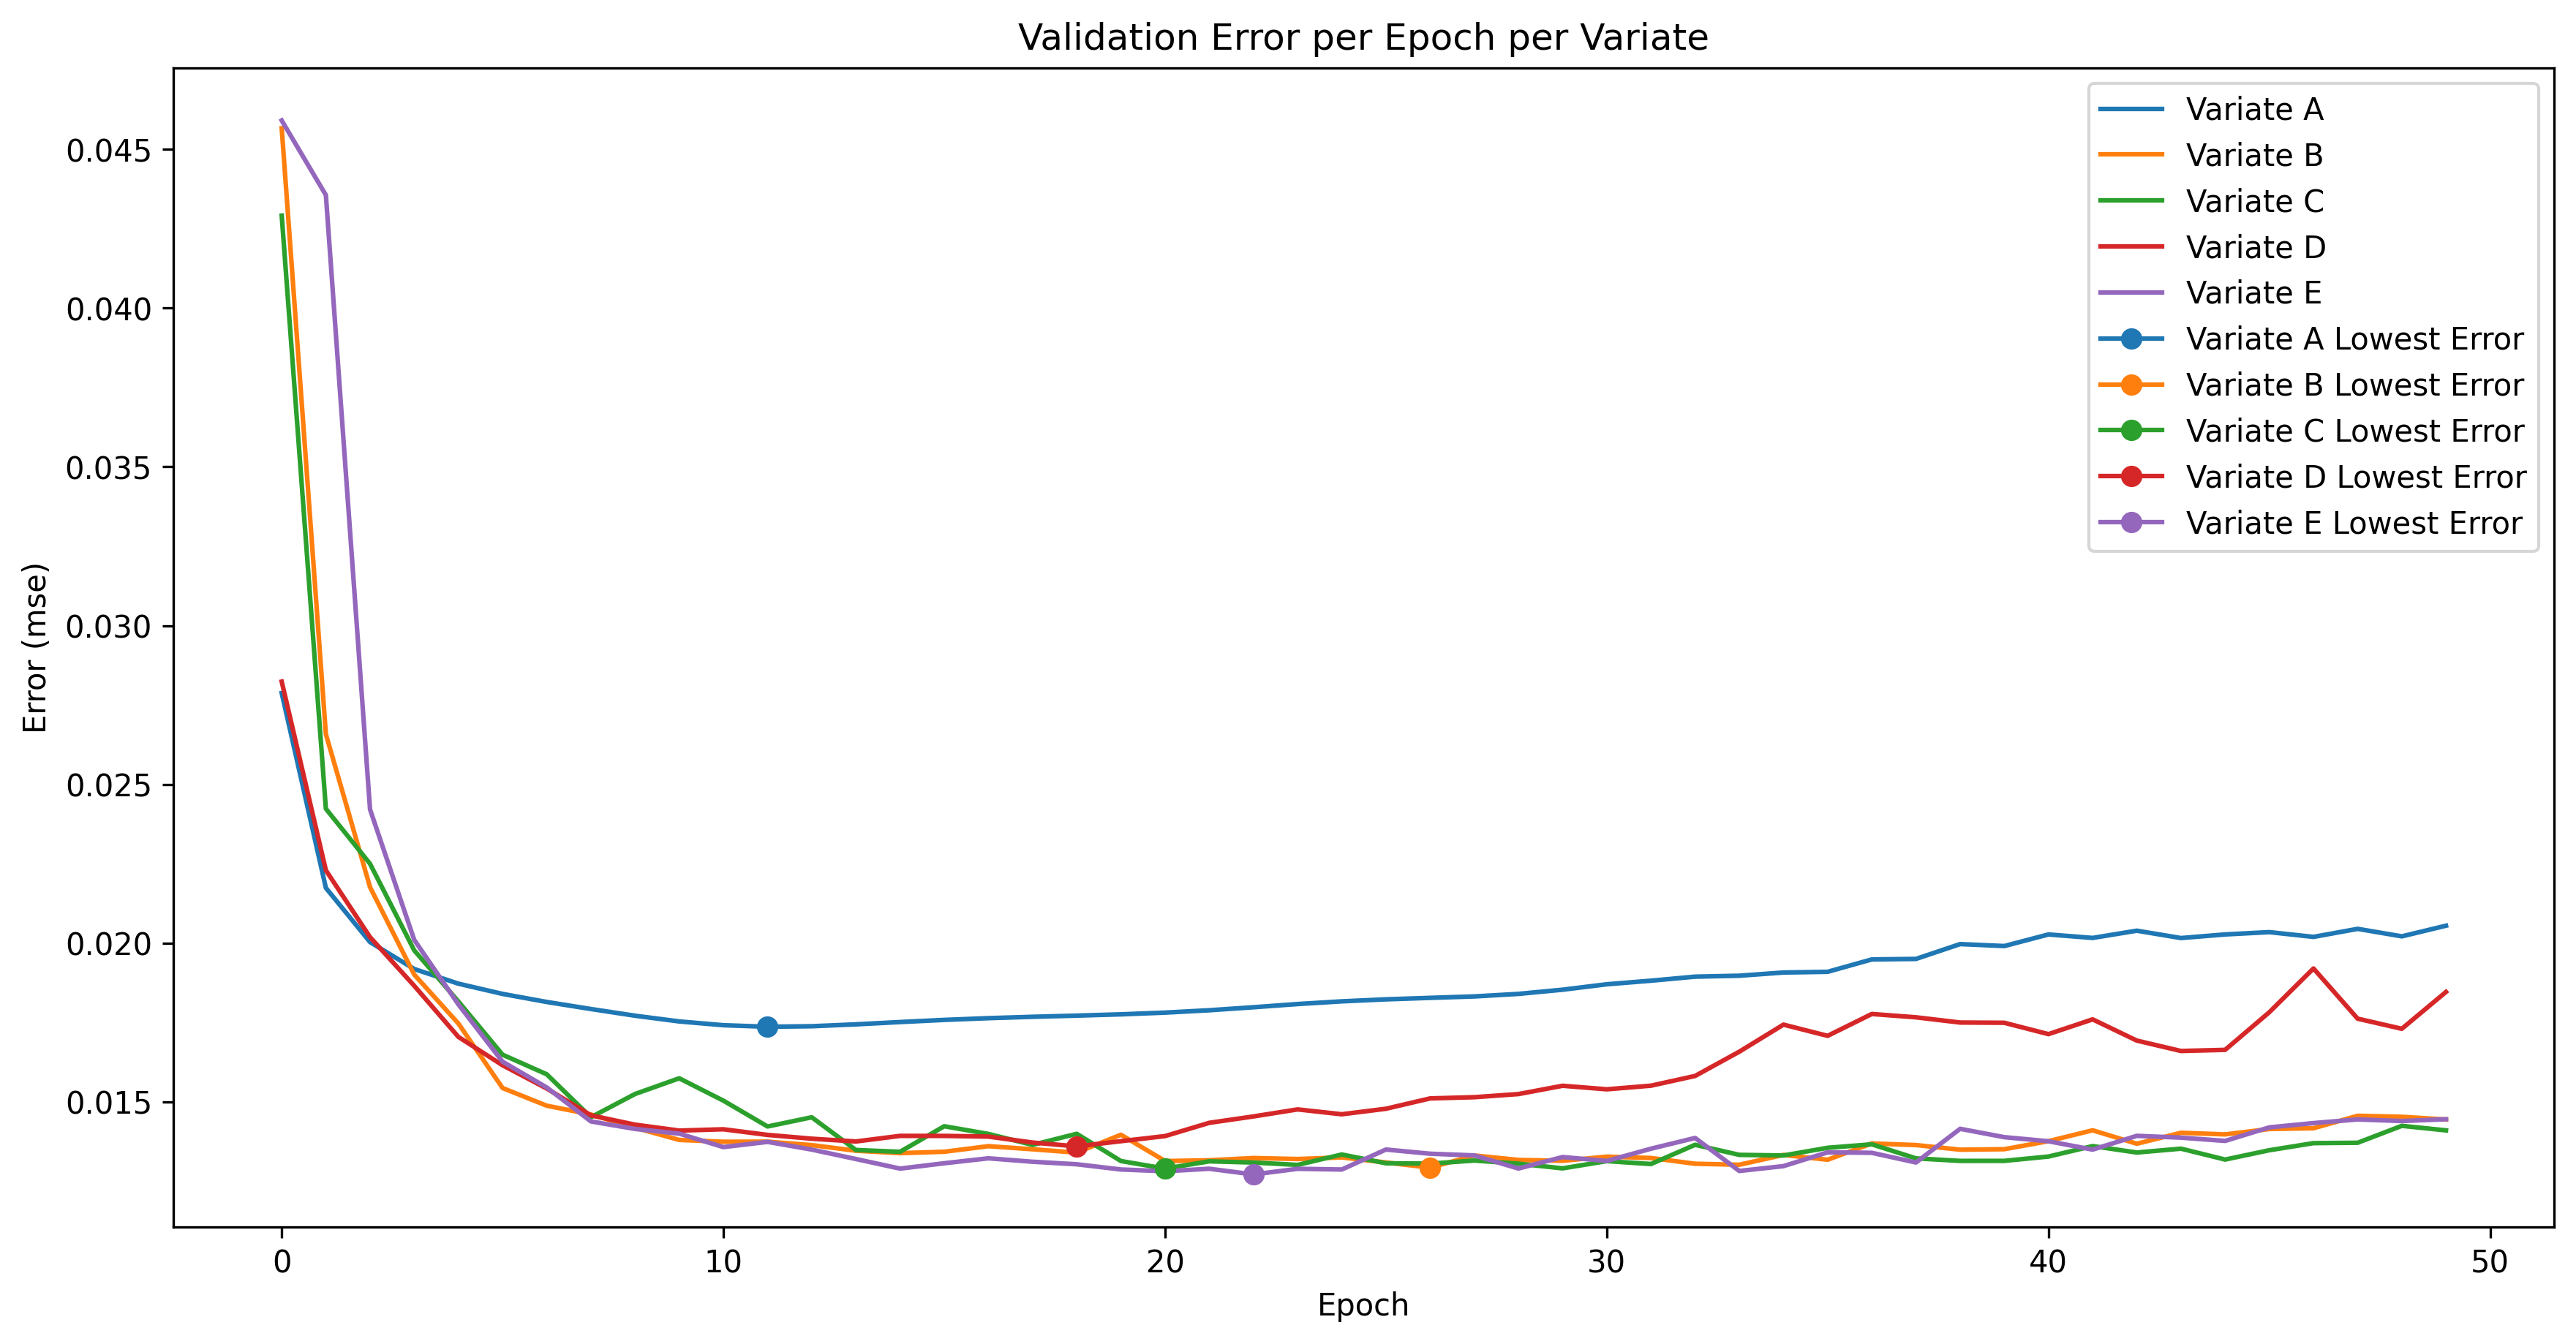

In [10]:
plt.plot(varA, label="Variate A", color="C0")
plt.plot(varB, label="Variate B", color="C1")
plt.plot(varC, label="Variate C", color="C2")
plt.plot(varD, label="Variate D", color="C3")
plt.plot(varE, label="Variate E", color="C4")

plt.plot(varA_idx, varA_val, marker='o', color="C0", label="Variate A Lowest Error")
plt.plot(varB_idx, varB_val, marker='o', color="C1", label="Variate B Lowest Error")
plt.plot(varC_idx, varC_val, marker='o', color="C2", label="Variate C Lowest Error")
plt.plot(varD_idx, varD_val, marker='o', color="C3", label="Variate D Lowest Error")
plt.plot(varE_idx, varE_val, marker='o', color="C4", label="Variate E Lowest Error")

plt.title("Validation Error per Epoch per Variate")
plt.xlabel("Epoch")
plt.ylabel("Error (mse)")
plt.legend()
plt.show()

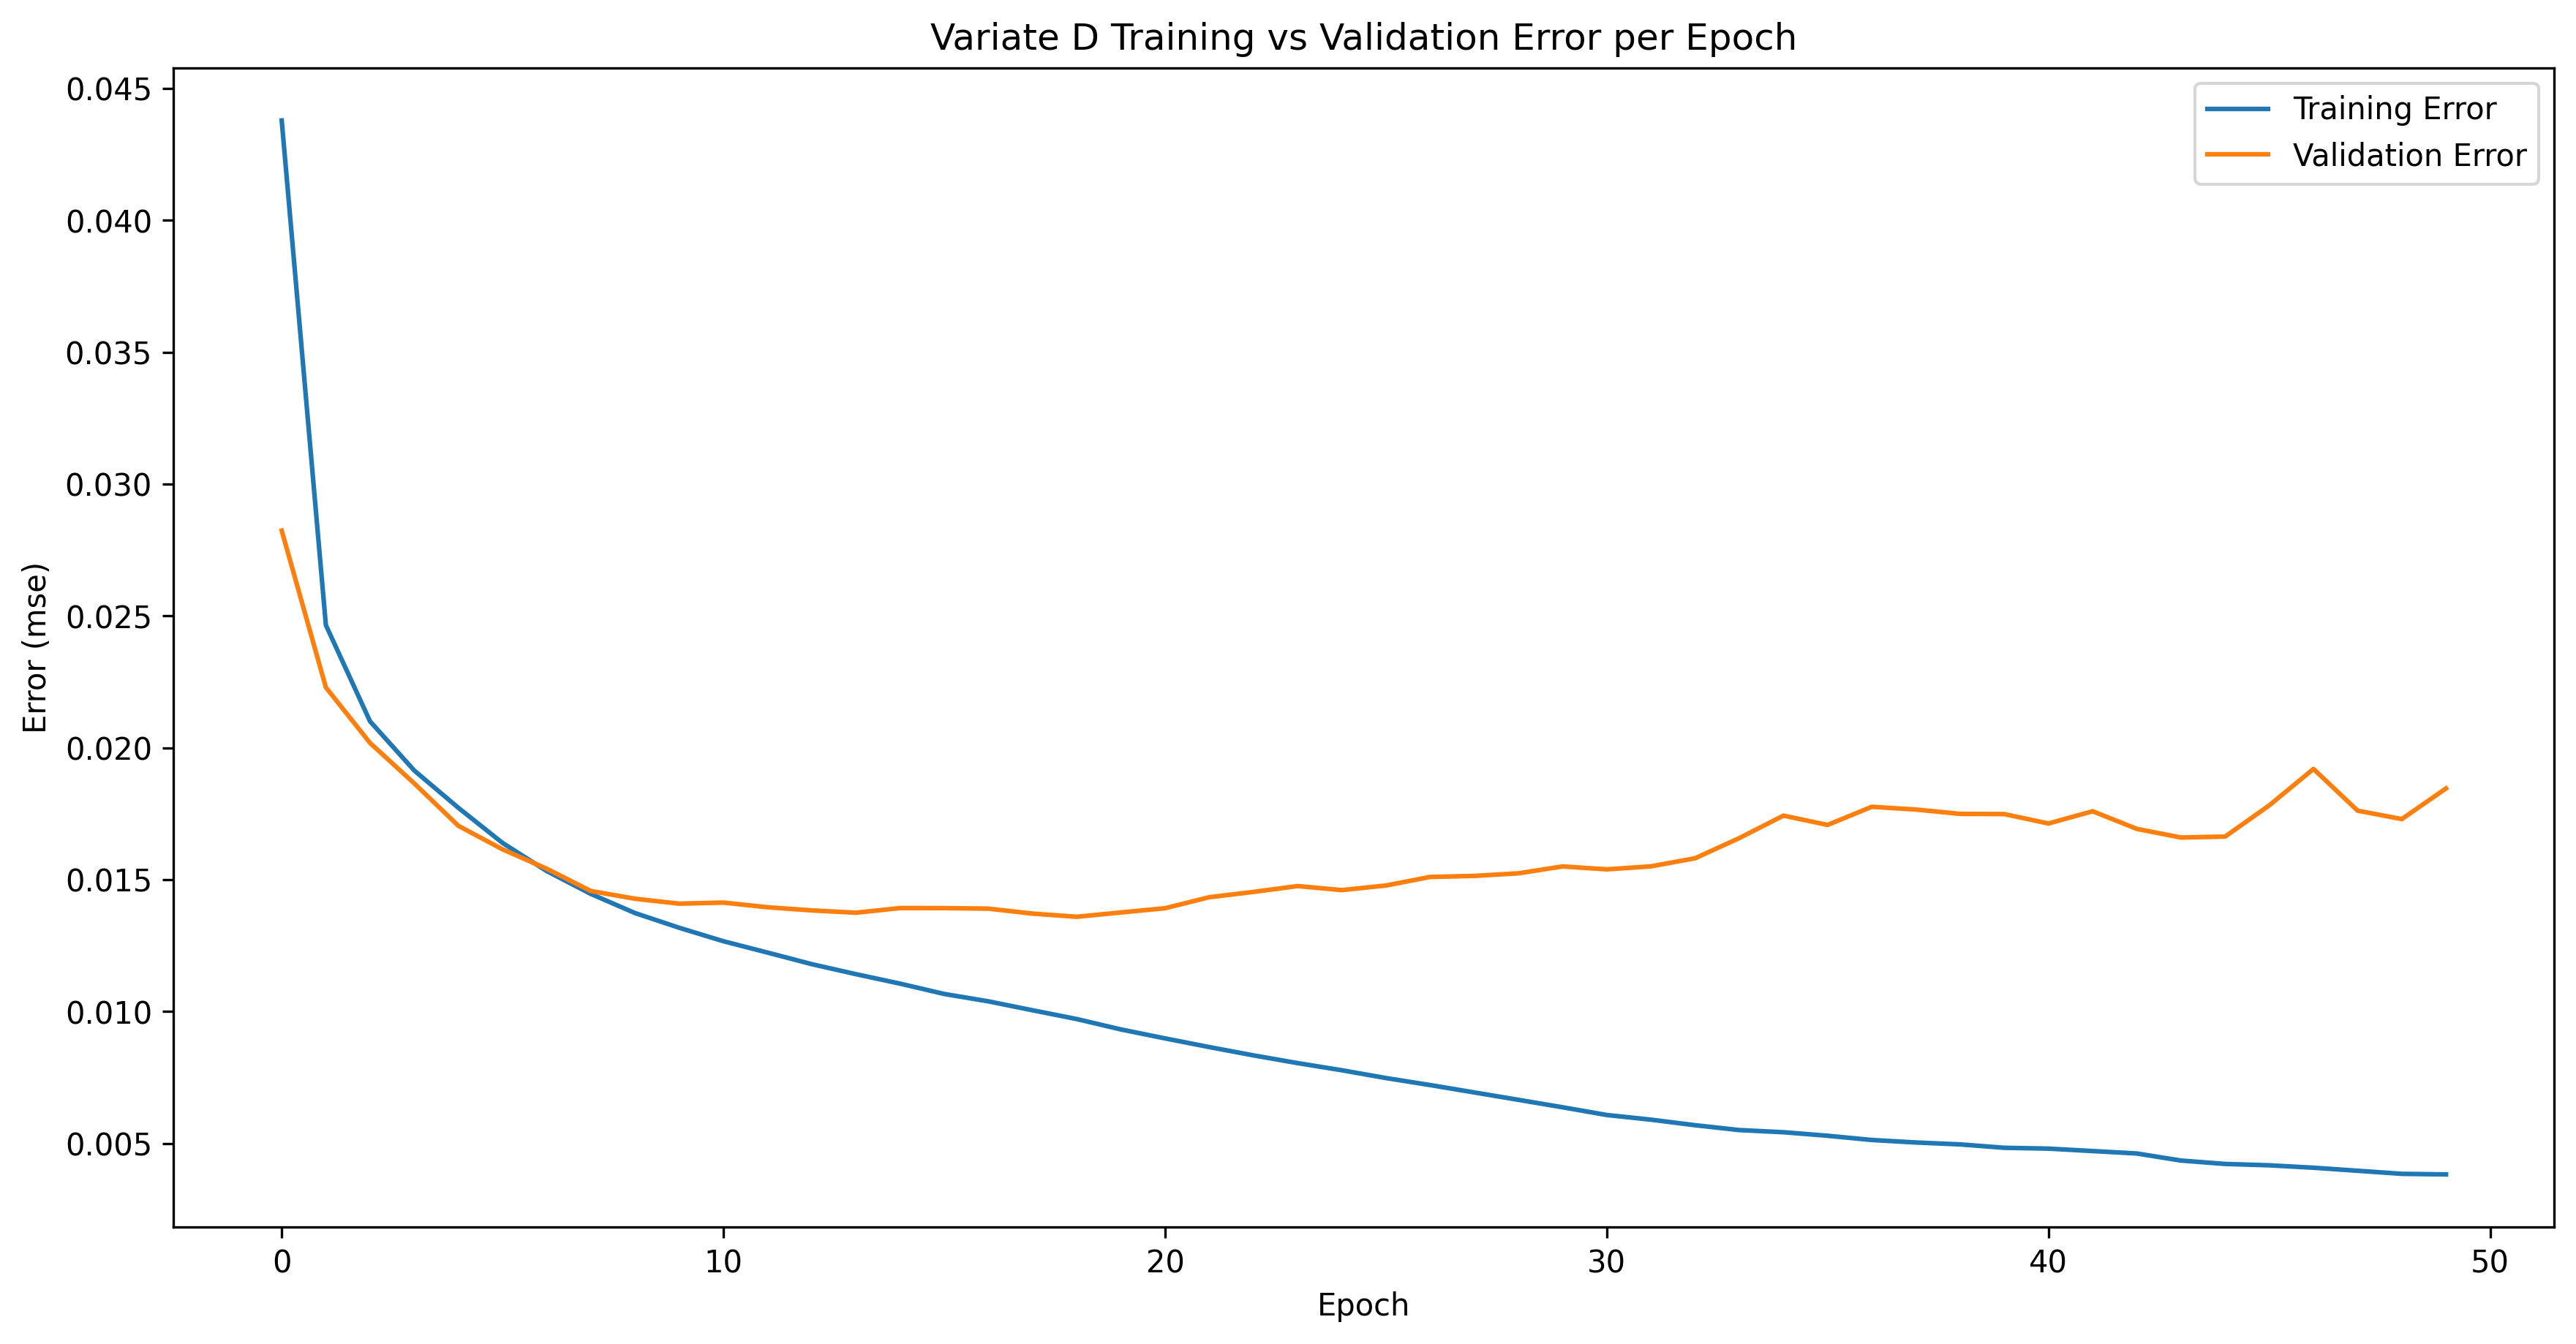

In [11]:
varD_train_error = np.load(varD_path, allow_pickle=True).tolist()['mse']

plt.plot(varD_train_error, label="Training Error")
plt.plot(varD, label="Validation Error")

plt.title("Variate D Training vs Validation Error per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Error (mse)")
plt.legend()
plt.show()

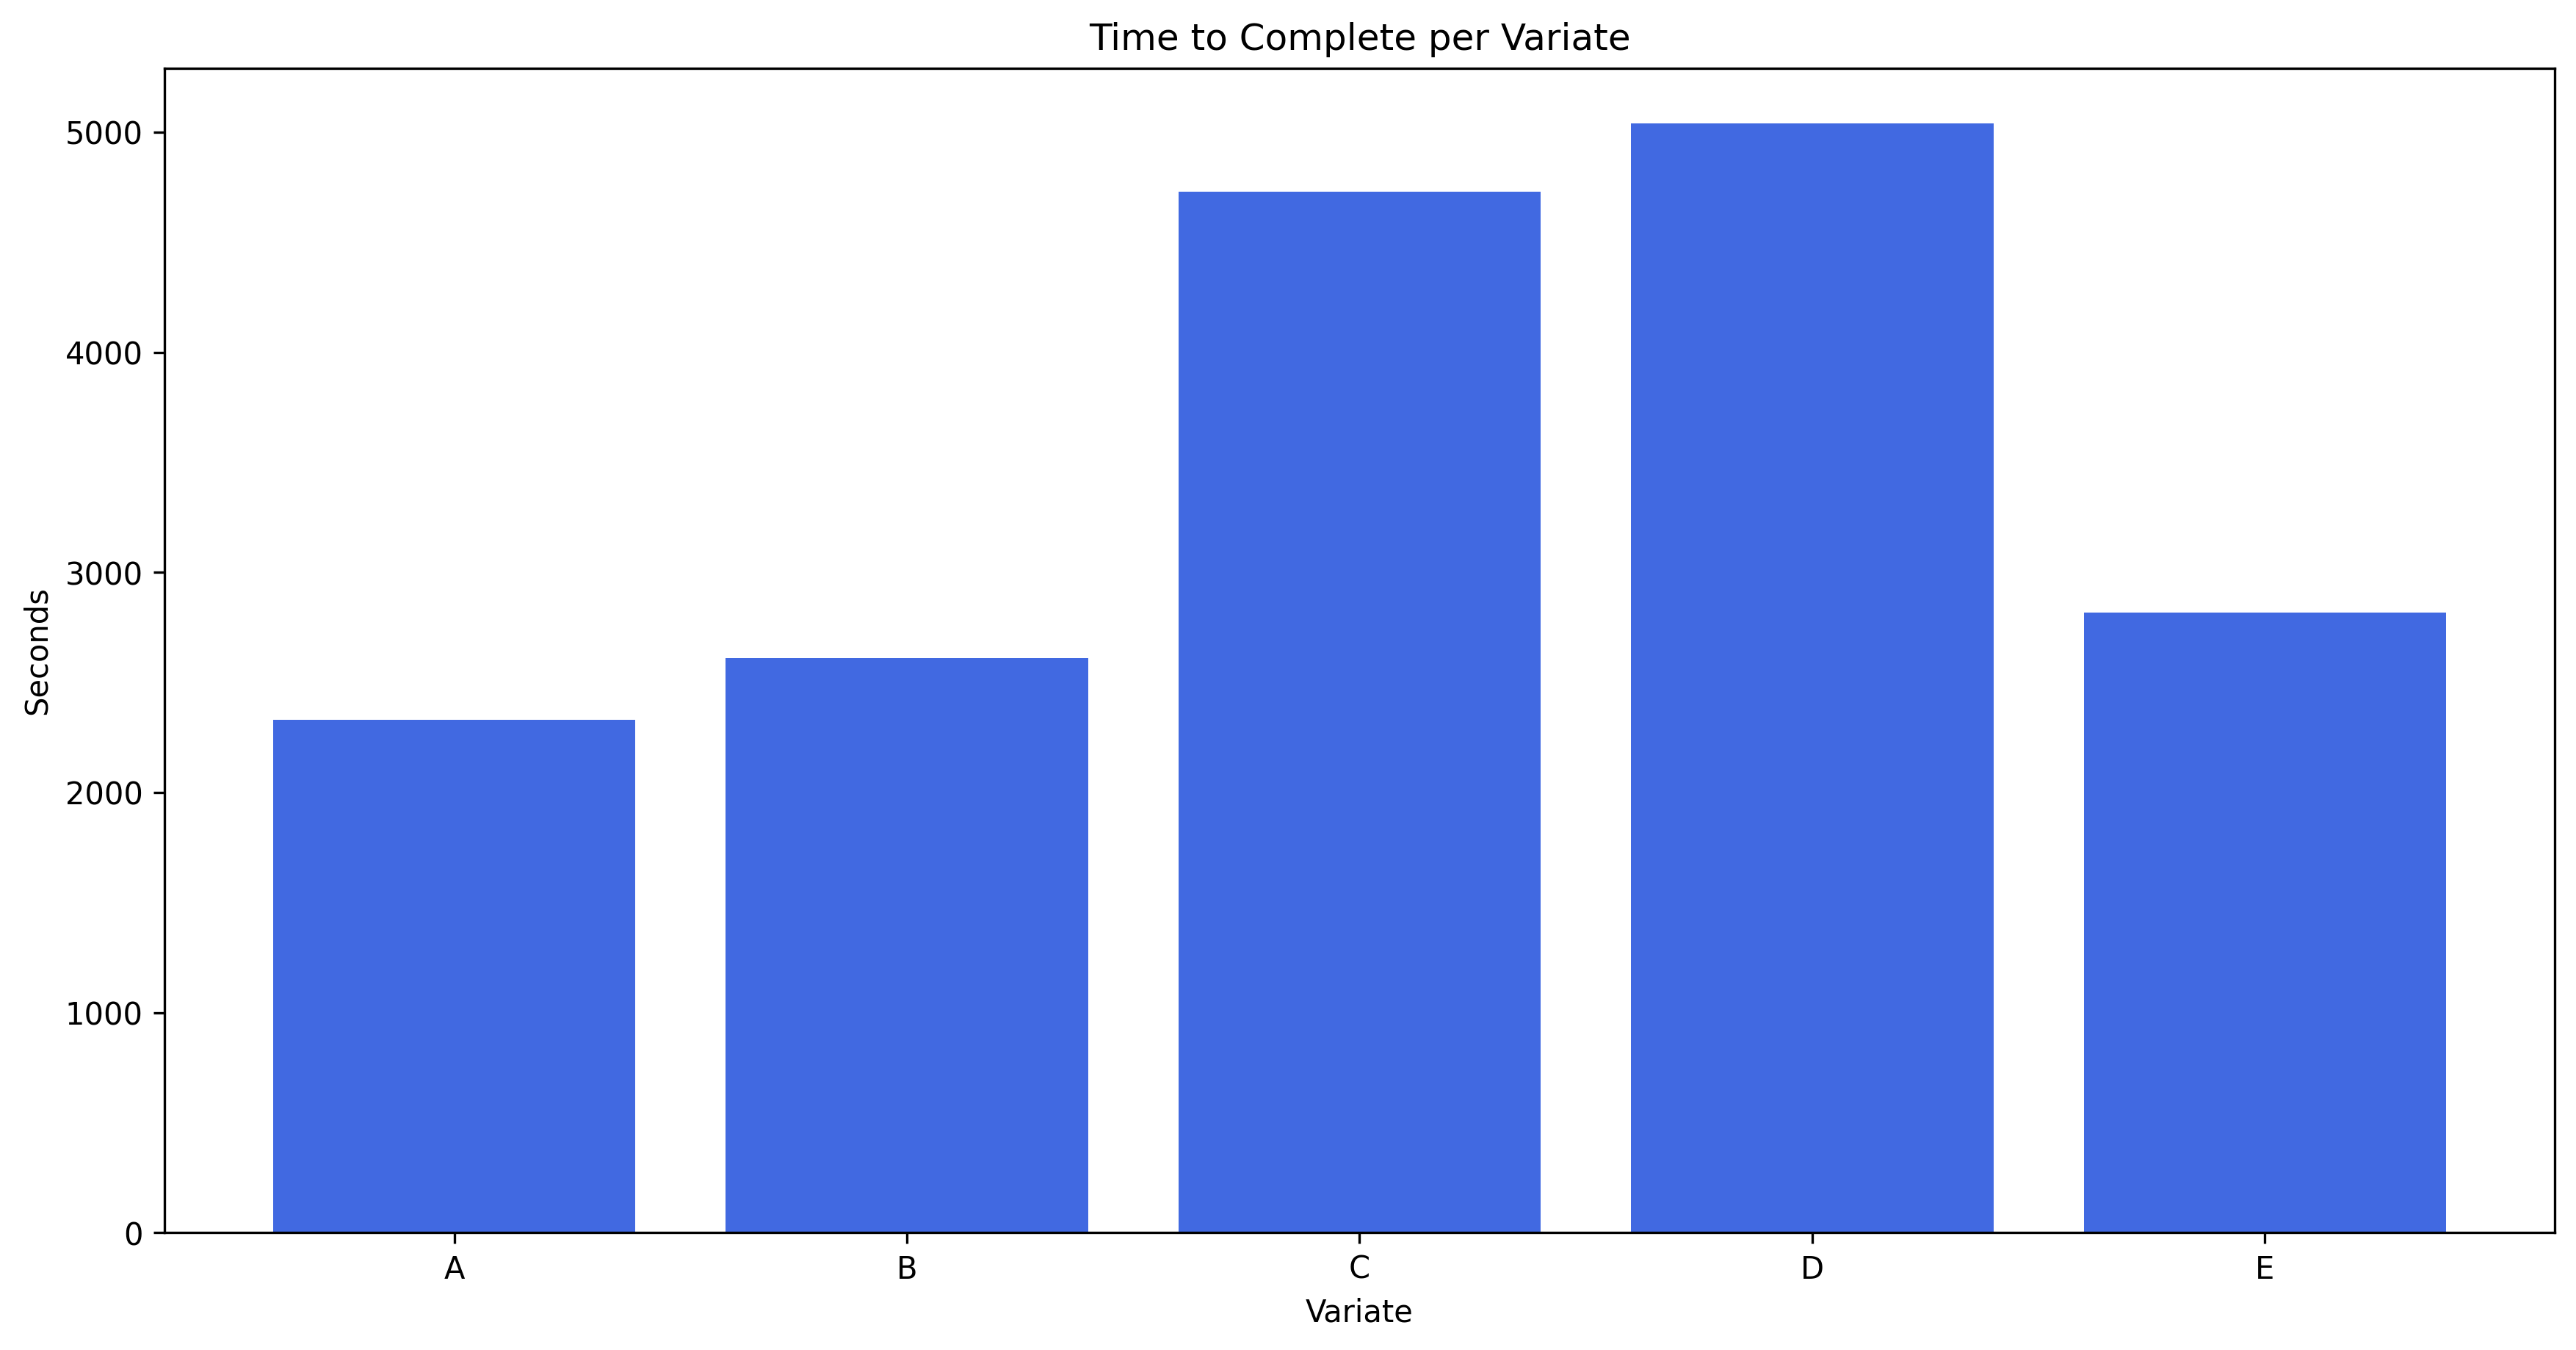

In [34]:
complete = [2330.6830, 2611.3986, 4730.4419, 5039.0351, 2817.1094]
params = [38682674, 37990962, 72602162, 75981362, 38007602]

plt.bar(['A', 'B', 'C', 'D', 'E'], complete, color='royalblue')
plt.xlabel("Variate")
plt.ylabel("Seconds")
plt.title("Time to Complete per Variate")
plt.show()

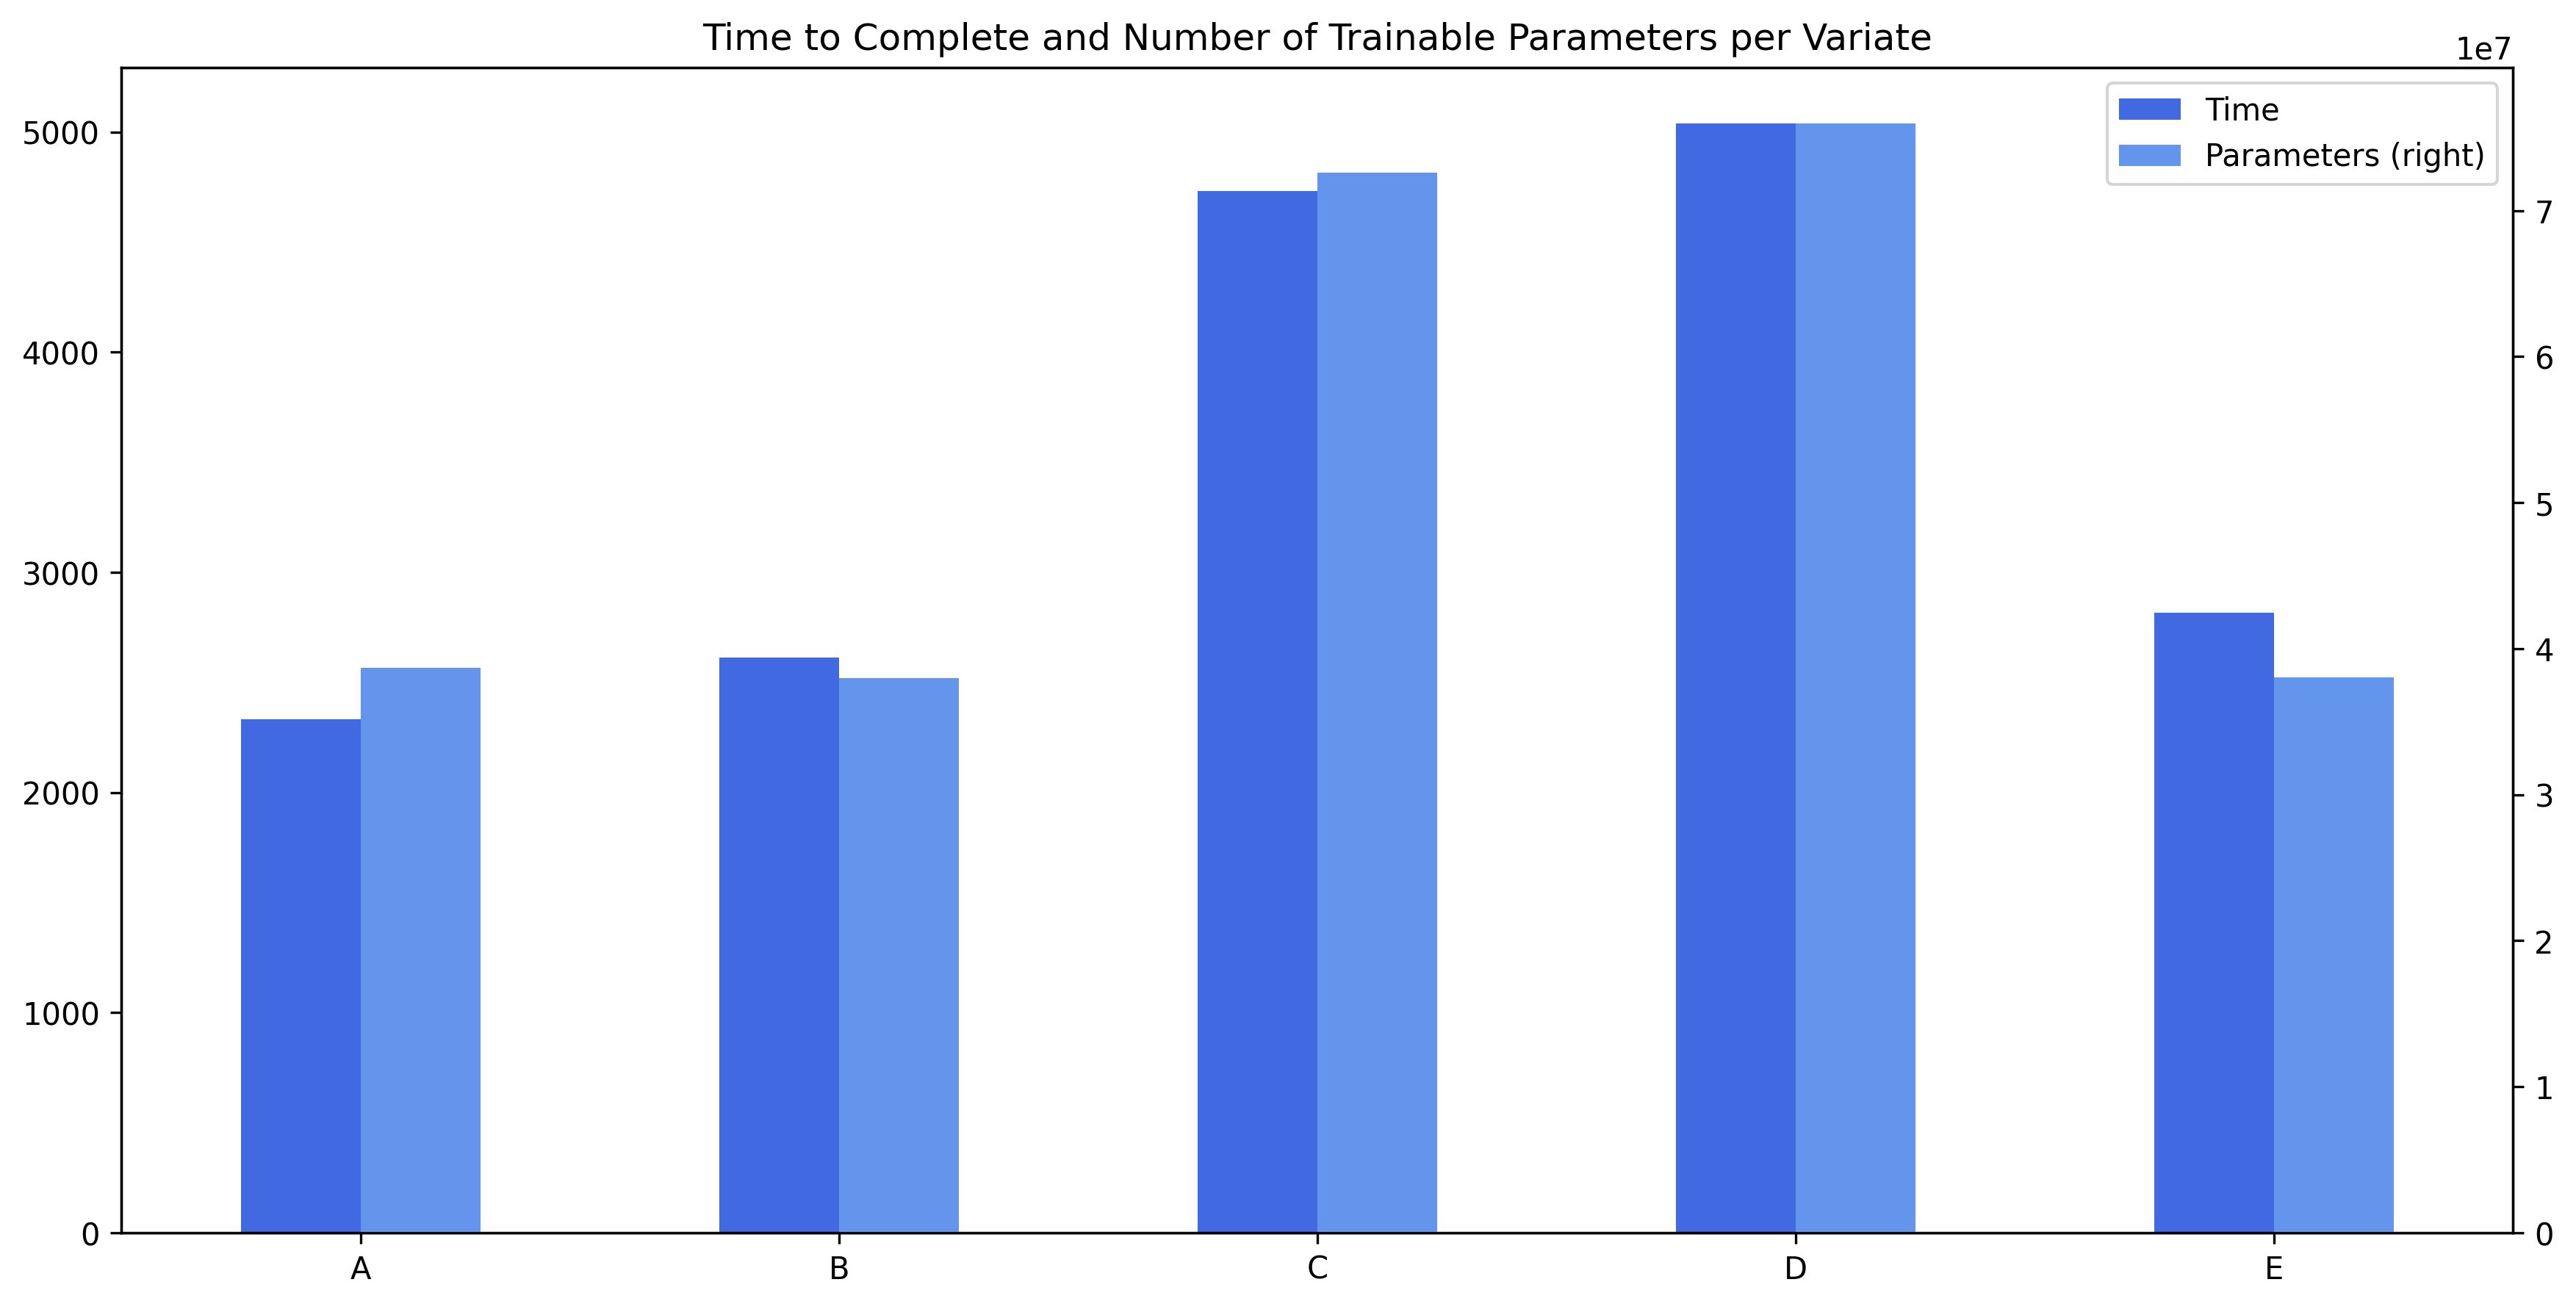

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

s = StringIO("""     Time     Parameters
A     2330.6830   38682674
B     2611.3986   37990962
C    4730.4419  72602162
D    5039.0351  75981362
E    2817.1094  38007602""")

my_colors = list(islice(cycle(["royalblue", "cornflowerblue"]), None, 5))

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

_ = df.plot(kind='bar', secondary_y='Parameters', rot=0, color=my_colors)
plt.title("Time to Complete and Number of Trainable Parameters per Variate")
plt.show()